In [1]:
# Import Needed Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
df = pd.read_csv('time_series.csv', index_col=0)
df.head()

,date,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.0000
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.9313
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.5859
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.0000
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",-0.3400


In [3]:
df2 = pd.read_csv('sentiment3.csv', index_col=0)
df2.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,qtr,day,time,date2
0,Monday,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,2,Monday,23:39:00,2001-05-14
1,Friday,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,2,Friday,20:51:00,2001-05-04
2,Wednesday,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,4,Wednesday,10:00:00,2000-10-18
3,Monday,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,4,Monday,13:13:00,2000-10-23
4,Thursday,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,3,Thursday,12:07:00,2000-08-31


In [4]:
df.shape

(517401, 2)

In [5]:
df2.shape

(516796, 17)

In [6]:
df3 = pd.read_csv('sentiment.csv', index_col=0)
df3.head()

,file,message,date,sender,subject,content,clean,tokenize,stop_words,lemmatize,sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN,Here is our forecast\n\n,here is our forecast\n\n,here is our forecast,forecast,forecast,0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400


In [7]:
df3.shape

(517401, 11)

In [8]:
# adding my sentiment scores to data

# installing textblob library for sentiment analysis scoring
from textblob import TextBlob

# sentiment scoring function
def sentiment_scores(string):
    '''
    This function takes in a string of text and applies the textblob function, returning 
    a score for polarity and subjectivity.
    
        - Polarity (float; -1, 1) negative, nuetral, positive sentiment
        - Subjectivity (float; 0, 1) 0, most objective // 1, most subjective
    '''
    
    polarity, subjectivity = TextBlob(str(string)).sentiment
    
    return polarity, subjectivity

# function to add textblob sentiment scores to df
def add_scores(df, clean_msg_col):
    '''
    This function takes in a df and column of strings to apply the sentiment_scores
    textblob function to. It returns a df with the polarity and subjectivity scores added.
    '''
    
    df['polarity, subjectivity'] = df[clean_msg_col].apply(sentiment_scores)
    
    pol = []
    subj = []
    for tuple_ in df['polarity, subjectivity']:
        pol.append(list(tuple_)[0])
        subj.append(list(tuple_)[1])
    
    print('polarity and subjectivity algo complete')
    # df = df.drop(columns = ['polarity, sentiment'])
    df['polarity'] = pol
    df['subjectivity'] = subj
          
    print('added sub and pol to df')
    
    # dropping polarity, subjectivity col
    df.drop(columns = ['polarity, subjectivity'], inplace = True)
    
    return df

In [14]:
df4 = add_scores(df3, 'lemmatize')
df4.head()

polarity and subjectivity algo complete
added sub and pol to df


,file,message,date,sender,subject,content,clean,tokenize,stop_words,lemmatize,sentiment,polarity,subjectivity
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN,Here is our forecast\n\n,here is our forecast\n\n,here is our forecast,forecast,forecast,0.0000,0.00,0.000000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000


In [15]:
# Creating a dataframe that has date and just the 3 scores
df4 = df4.drop(columns = ['file', 'message', 'sender', 'subject', 'content', 'clean', 'tokenize', 'stop_words', 'lemmatize'])
df4.head()

,date,sentiment,polarity,subjectivity
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.0000,0.00,0.000000
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.9313,0.15,0.613333
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.5859,0.75,0.950000
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.0000,0.00,0.000000
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",-0.3400,0.00,0.000000


In [16]:
# change date column to datetime format
df4.date = pd.to_datetime(df4.date, utc=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517401 entries, 0 to 517400
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   date          517401 non-null  datetime64[ns, UTC]
 1   sentiment     517401 non-null  float64            
 2   polarity      517401 non-null  float64            
 3   subjectivity  517401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 19.7 MB


In [17]:
# Set index at date columnad and sort index
df4 = df4.set_index("date").sort_index()
df4.head()

,sentiment,polarity,subjectivity
date,,,
1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250
1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000
1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575
1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333
1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810


In [19]:
df4['year'] = df4.index.year
df4['month'] = df4.index.month
df4['day'] = df4.index.day

In [36]:
df4 = df4[df4.year < 2003]
df4 = df4[df4.year > 1998]

In [37]:
train = df4[df4.year == 1999]
highlight1 = df4[df4.year == 2000]
highlight2 = df4[df4.year == 2001]
test = df4[df4.year == 2002]

# Graph with sentiment

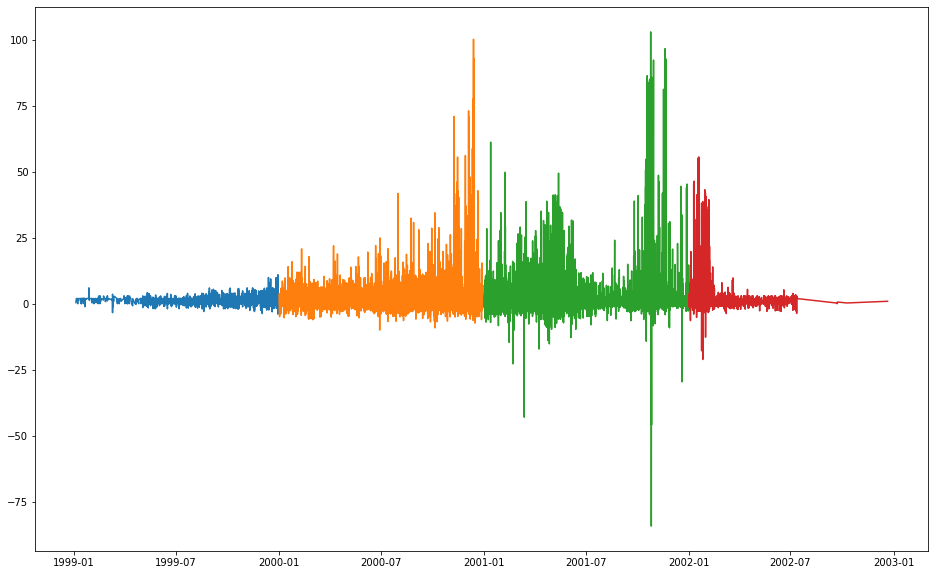

In [38]:
# Recreate model from preivous explore to show just those highlighted years with sentiment

train_by_date = train.groupby(['date']).sentiment.sum().reset_index()
#train_by_date.plot(x = 'date', y = 'sentiment')

highlight1_by_date = highlight1.groupby(['date']).sentiment.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

highlight2_by_date = highlight2.groupby(['date']).sentiment.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

test_by_date = test.groupby(['date']).sentiment.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

plt.figure(figsize = (16, 10))
plt.plot(train_by_date.date, train_by_date.sentiment)
plt.plot(highlight1_by_date.date, highlight1_by_date.sentiment)
plt.plot(highlight2_by_date.date, highlight2_by_date.sentiment)
plt.plot(test_by_date.date, test_by_date.sentiment)
plt.show()

# Graph with subjectivity

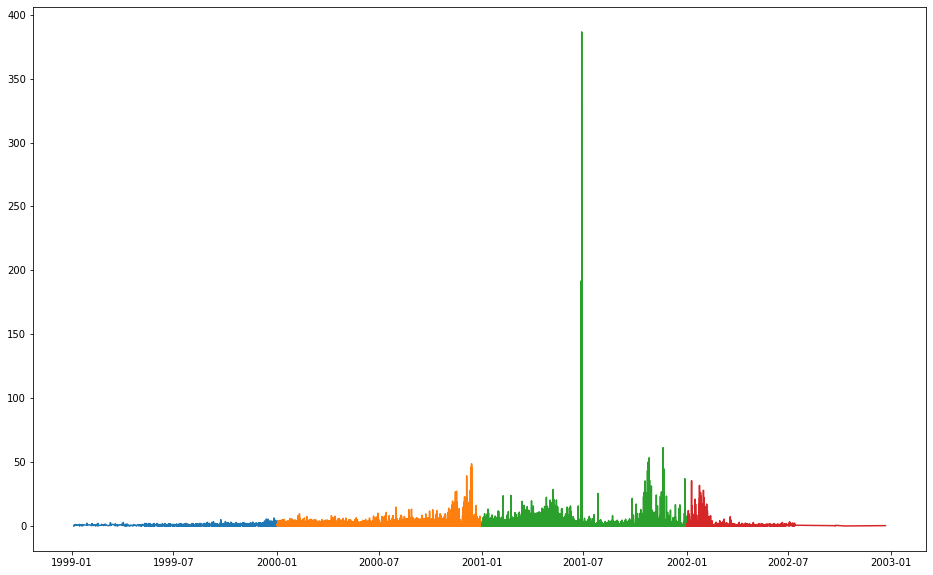

In [39]:
# Recreate model from preivous explore to show just those highlighted years with sentiment

train_by_date = train.groupby(['date']).subjectivity.sum().reset_index()
#train_by_date.plot(x = 'date', y = 'sentiment')

highlight1_by_date = highlight1.groupby(['date']).subjectivity.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

highlight2_by_date = highlight2.groupby(['date']).subjectivity.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

test_by_date = test.groupby(['date']).subjectivity.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

plt.figure(figsize = (16, 10))
plt.plot(train_by_date.date, train_by_date.subjectivity)
plt.plot(highlight1_by_date.date, highlight1_by_date.subjectivity)
plt.plot(highlight2_by_date.date, highlight2_by_date.subjectivity)
plt.plot(test_by_date.date, test_by_date.subjectivity)
plt.show()

# Graph with polarity

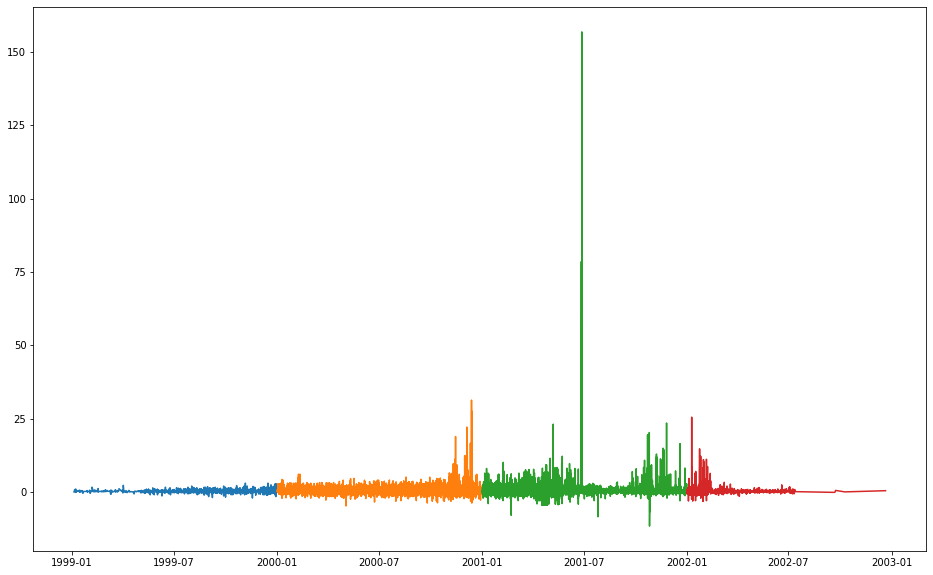

In [40]:
# Recreate model from preivous explore to show just those highlighted years with sentiment

train_by_date = train.groupby(['date']).polarity.sum().reset_index()
#train_by_date.plot(x = 'date', y = 'sentiment')

highlight1_by_date = highlight1.groupby(['date']).polarity.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

highlight2_by_date = highlight2.groupby(['date']).polarity.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

test_by_date = test.groupby(['date']).polarity.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

plt.figure(figsize = (16, 10))
plt.plot(train_by_date.date, train_by_date.polarity)
plt.plot(highlight1_by_date.date, highlight1_by_date.polarity)
plt.plot(highlight2_by_date.date, highlight2_by_date.polarity)
plt.plot(test_by_date.date, test_by_date.polarity)
plt.show()

# Create seasonailty trends for both those groups

In [41]:
y = df4.sentiment
y2 = df4.subjectivity
y3 = df4.polarity

In [42]:
#A seasonal subseries plot shows the change year-over-year within each month.
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
#table

#A seasonal subseries plot shows the change year-over-year within each month.
table2 = y2.groupby([y2.index.year, y2.index.month]).mean().unstack()
#table2

#A seasonal subseries plot shows the change year-over-year within each month.
table3 = y3.groupby([y3.index.year, y3.index.month]).mean().unstack()
#table3
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1999,0.794315,0.706930,0.674002,0.548211,0.574102,0.551710,0.567978,0.571055,0.604361,0.590513,0.608944,0.608433
2000,0.606937,0.631134,0.600195,0.612846,0.623999,0.614350,0.603115,0.599697,0.598724,0.622865,0.628109,0.630977
2001,0.603565,0.587143,0.613894,0.596788,0.648954,0.583512,0.633510,0.652056,0.652640,0.656924,0.676067,0.659911
2002,0.575792,0.646176,0.637265,0.610282,0.660961,0.630649,0.396391,NaN,0.303483,0.273200,NaN,0.915300


### Seasonality with just Sentiment

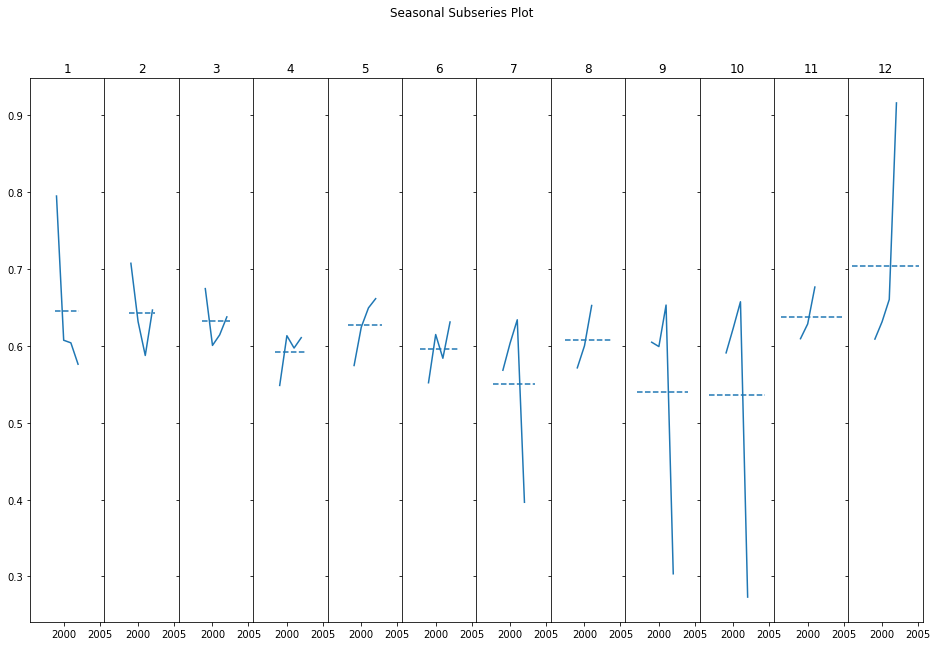

In [43]:
#plt.figure(figsize=(16,10))
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16,10))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

## Seasonality with just Subjectivity

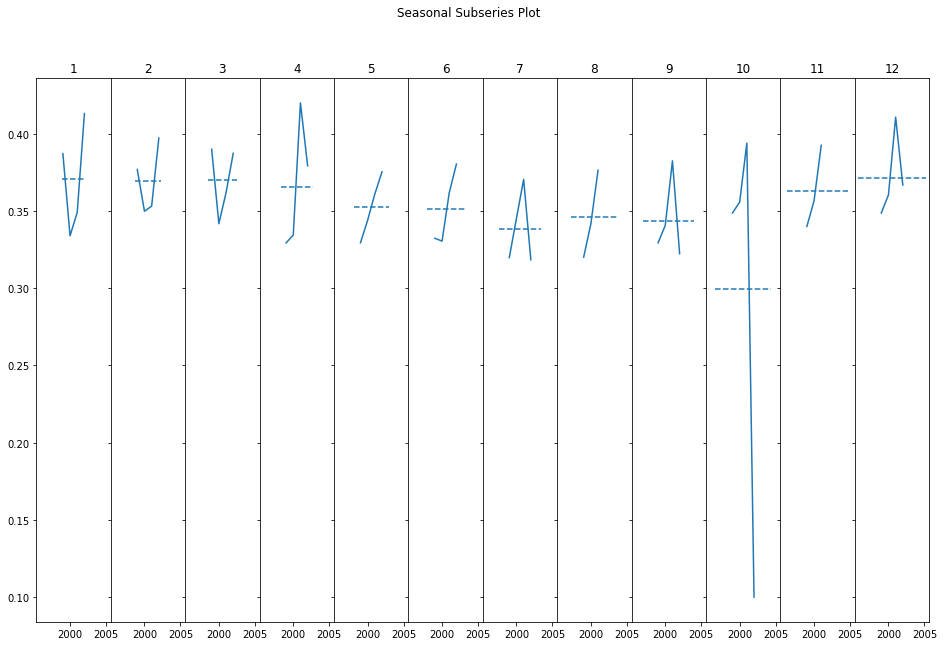

In [45]:
#plt.figure(figsize=(16,10))
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16,10))
for ax, (month, subset) in zip(axs, table2.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

## Seasonality with just Polarity

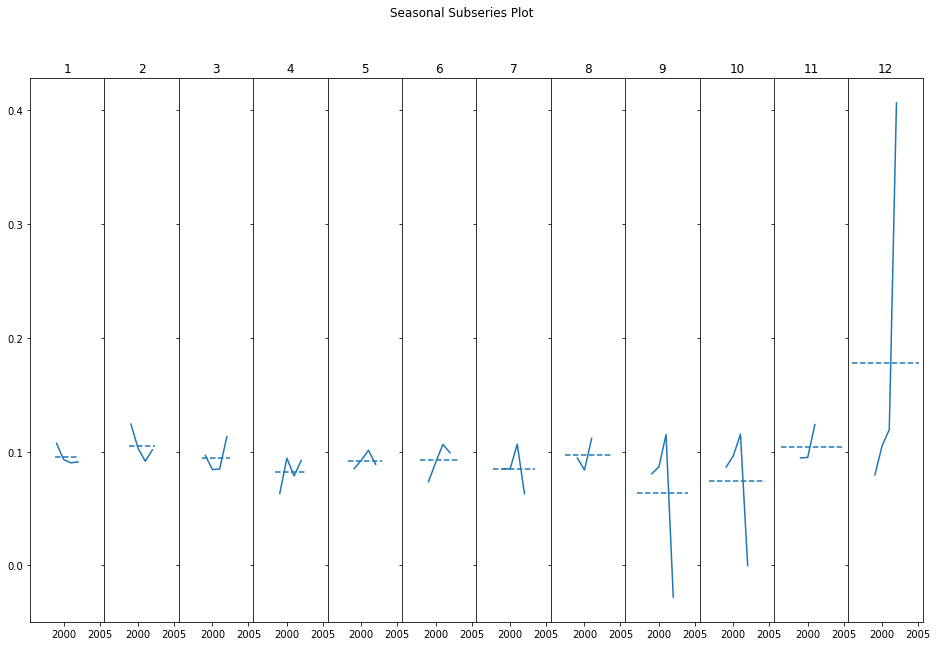

In [47]:
#plt.figure(figsize=(16,10))
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16,10))
for ax, (month, subset) in zip(axs, table3.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)